# CODSOFT task 1

        by William Onsare Morara

        email : williammorara28@gmail.com

# Problem statement 

Build a model that predicts whether a passenger on the Titanic survived or not.


## Objectives 
1 understand the titanic dataset.

2 visualize and understand the variables with the most impact on survival.

3 Build a model that predicts survival.

# Importing Libraries

In [1]:
import pandas as pd  #For dataframe manipulation
import numpy as np  # for numeric evaluation 
#for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading and previewing dataset

In [2]:
#loading the dataset and reviewing the first five rows

titanic_df = pd.read_csv("tested.csv")
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#Checking the number of columns available in the dataframe

titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

>PassengerId : Passenger number

>Survived : 0 = Dead 1 = Alive

>Pclass : 1 = First class 2 = Second class 3 = Third class

>Name : Name of passenger

>Sex : Gender

>Age : Age of passenger

>SibSp : Number of Siblings/Spouses Aboard

>Parch : Number of Parents/Children Aboard

>Ticket : Ticket number

>Fare : Passenger fare

>Cabin : Cabin number

>Embarked : Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown

In [4]:
#viewing the shape of the dataset

print(f'This titanic dataframe has {titanic_df.shape[0]} rows and {titanic_df.shape[1]} columns')

This titanic dataframe has 418 rows and 12 columns


In [5]:
#checking numerical and categorical columns

numerical = list(titanic_df.select_dtypes(include=["int64","float64"]).columns)
categorical = list(titanic_df.select_dtypes(include=["object"]).columns)
print("numerical columns are :", numerical) 
print("and the categorical columns are: ", categorical)

numerical columns are : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
and the categorical columns are:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [6]:
#checking for statistics of the numerical columns

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
#information about the dataset

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Data processing

we will check for missing values, duplicates and any inconsistency in the data and solve

In [8]:
# checking for missing values

missing_values = pd.DataFrame({'Missing values':titanic_df.isna().sum(),'percent of missing values' : titanic_df.isna().sum()/titanic_df.shape[0]})
missing_values

,Missing values,percent of missing values
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,0.205742
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.002392


In [9]:
# Checking for duplicated values

duplicated_values = titanic_df["PassengerId"].duplicated().sum()
duplicated_values

0

There are no duplicated values in our data frame  but there are missing values in the Age, Fare and Cabin columns.

Since the Cabin column has a large percent of missing values we will drop the entire column, for age and fare we will use the mean values to fill for missing values.

In [10]:
# droping the cabin column

titanic_df.drop(columns=["Cabin"], inplace=True)

In [11]:
# filing the age and fare columns with the mean

titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)
titanic_df["Fare"].fillna(titanic_df["Fare"].mean(), inplace=True)

checking to see if our changes have taken effect

In [12]:
missing_values = pd.DataFrame({'Missing values':titanic_df.isna().sum(),'percent of missing values' : titanic_df.isna().sum()/titanic_df.shape[0]})
missing_values

,Missing values,percent of missing values
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


our data is now ready for analysis

# E D A

## univariate analysis

          count
Survived       
0           266
1           152


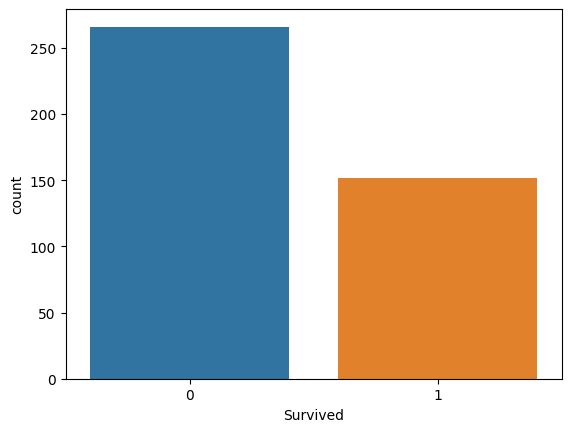

In [13]:
# passengers who survived

print(pd.DataFrame(titanic_df["Survived"].value_counts()))
sns.countplot(x=titanic_df["Survived"], data=titanic_df);

        count
Sex          
male      266
female    152


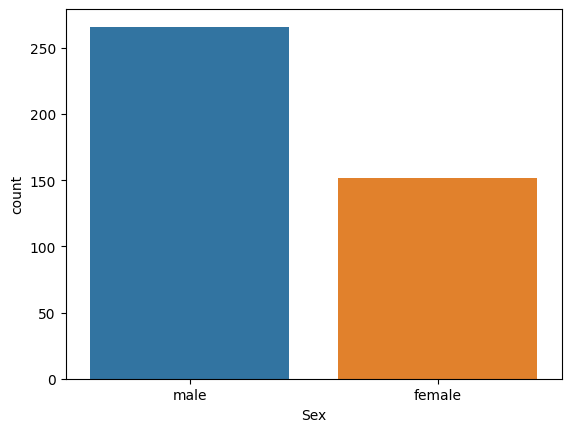

In [14]:
# gender of passengers

print(pd.DataFrame(titanic_df["Sex"].value_counts()))
sns.countplot(x=titanic_df["Sex"], data=titanic_df);

        count
Pclass       
3         218
1         107
2          93


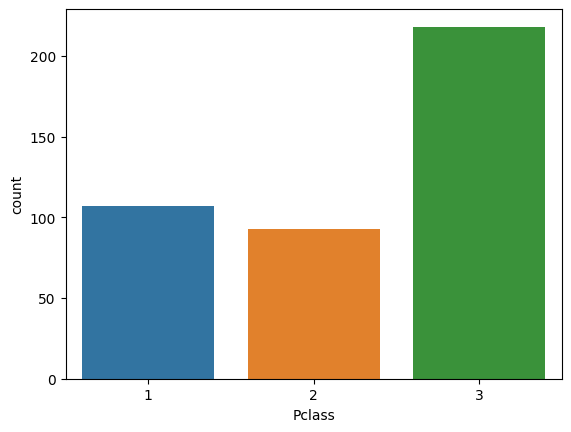

In [15]:
# passenger class in the titanic

print(pd.DataFrame(titanic_df["Pclass"].value_counts()))
sns.countplot(x=titanic_df["Pclass"], data=titanic_df);

          count
Embarked       
S           270
C           102
Q            46


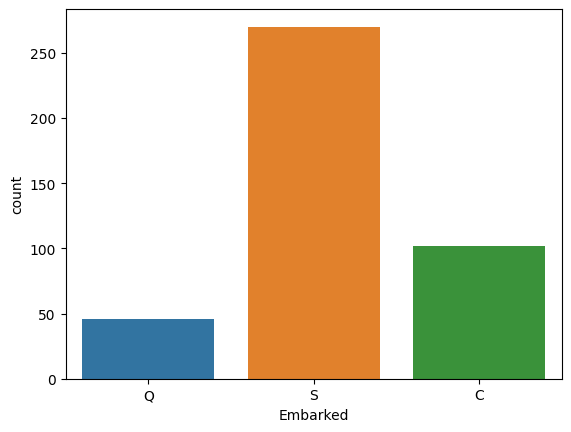

In [16]:
# place of boarding the titanic 

print(pd.DataFrame(titanic_df["Embarked"].value_counts()))
sns.countplot(x=titanic_df["Embarked"], data=titanic_df);

       count
Parch       
0        324
1         52
2         33
3          3
4          2
9          2
6          1
5          1


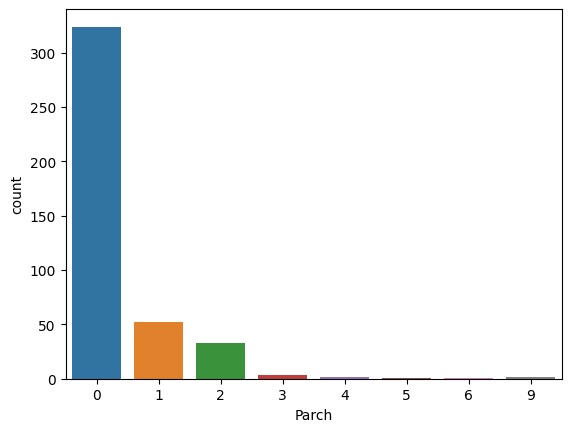

In [17]:
# number of children and parents aboard

print(pd.DataFrame(titanic_df["Parch"].value_counts()))
sns.countplot(x=titanic_df["Parch"], data=titanic_df);

       count
SibSp       
0        283
1        110
2         14
3          4
4          4
8          2
5          1


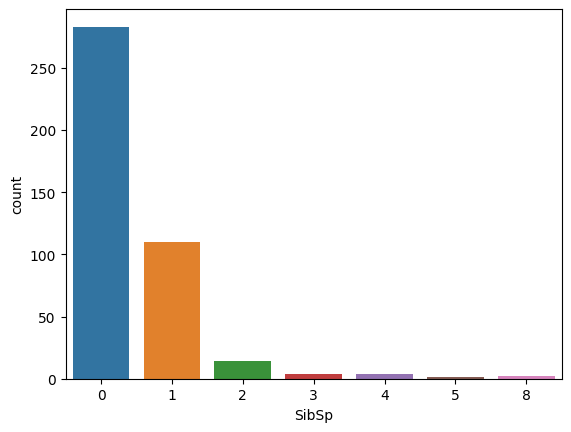

In [18]:
# number of siblings and spouses aboad

print(pd.DataFrame(titanic_df["SibSp"].value_counts()))
sns.countplot(x=titanic_df["SibSp"], data=titanic_df);

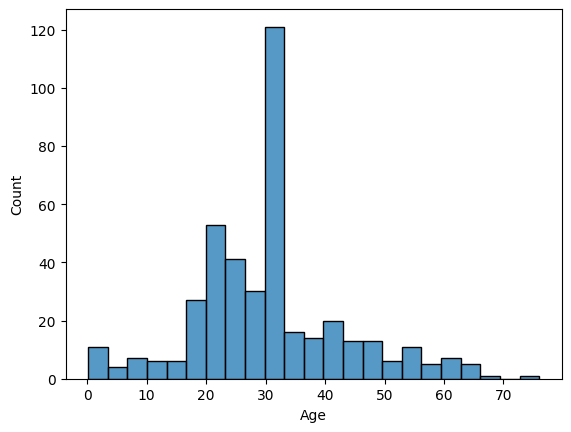

In [19]:
# checking the distribution of Age

sns.histplot(data=titanic_df, x=titanic_df["Age"]);

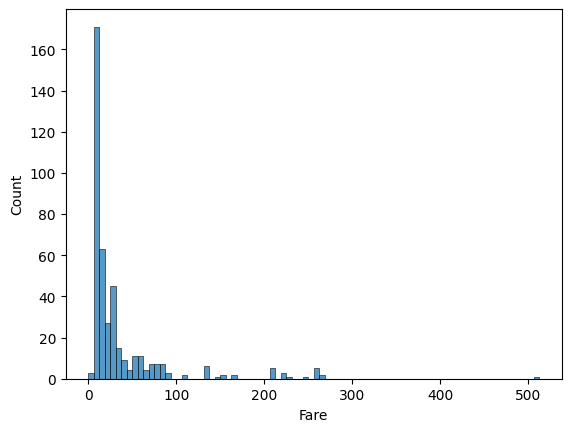

In [20]:
# checking the distribution of fare

sns.histplot(data=titanic_df, x=titanic_df["Fare"]);

## Bi-variate analysis


                 count
Survived Sex          
0        male      266
1        female    152


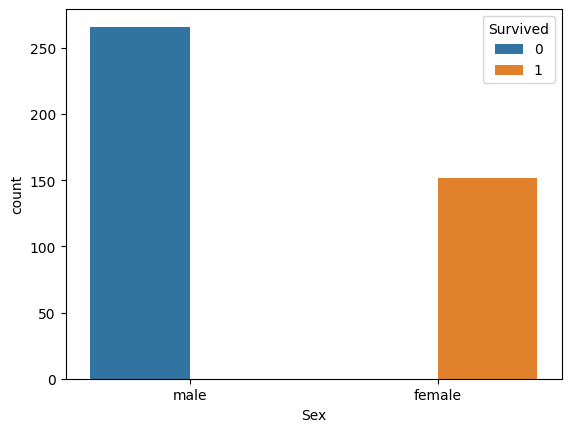

In [21]:
print(pd.DataFrame(titanic_df["Sex"].groupby(titanic_df["Survived"]).value_counts()))
sns.countplot(x=titanic_df["Sex"], hue="Survived", data=titanic_df);

                   count
Survived Embarked       
0        S           182
         C            62
         Q            22
1        S            88
         C            40
         Q            24


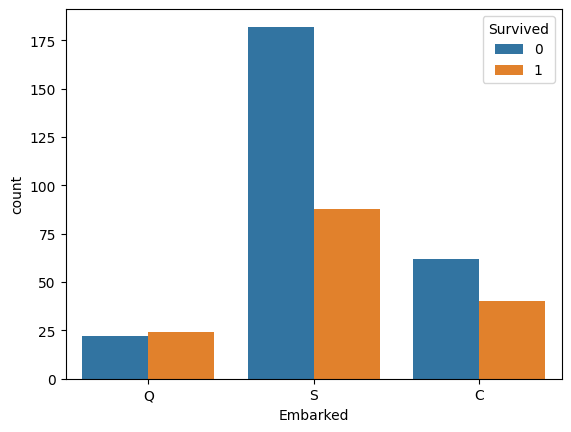

In [22]:
print(pd.DataFrame(titanic_df["Embarked"].groupby(titanic_df["Survived"]).value_counts()))
sns.countplot(x=titanic_df["Embarked"], hue="Survived", data=titanic_df);

                 count
Survived Pclass       
0        3         146
         2          63
         1          57
1        3          72
         1          50
         2          30


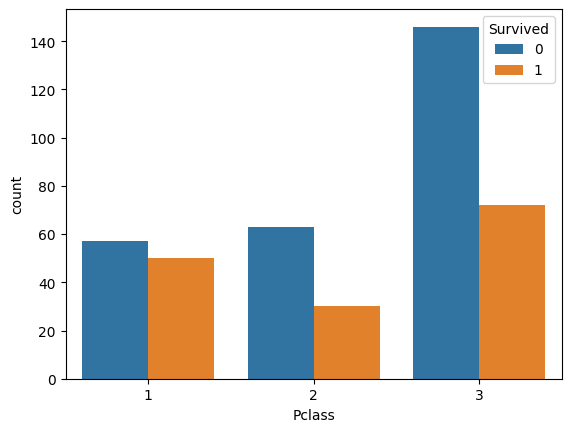

In [23]:
print(pd.DataFrame(titanic_df["Pclass"].groupby(titanic_df["Survived"]).value_counts()))
sns.countplot(x=titanic_df["Pclass"], hue="Survived", data=titanic_df);

                count
Survived Parch       
0        0        225
         1         24
         2         13
         3          1
         5          1
         6          1
         9          1
1        0         99
         1         28
         2         20
         3          2
         4          2
         9          1


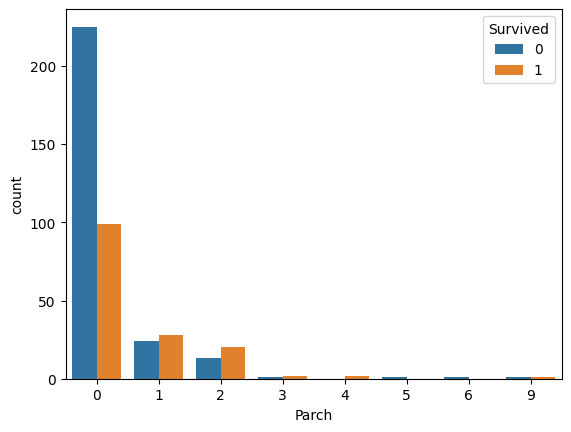

In [24]:
print(pd.DataFrame(titanic_df["Parch"].groupby(titanic_df["Survived"]).value_counts()))
sns.countplot(x=titanic_df["Parch"], hue="Survived", data=titanic_df);

                count
Survived SibSp       
0        0        195
         1         56
         2          8
         3          3
         4          3
         8          1
1        0         88
         1         54
         2          6
         3          1
         4          1
         5          1
         8          1


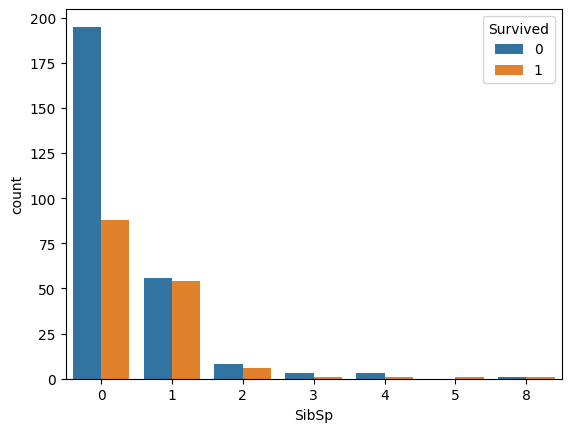

In [25]:
print(pd.DataFrame(titanic_df["SibSp"].groupby(titanic_df["Survived"]).value_counts()))
sns.countplot(x=titanic_df["SibSp"], hue="Survived", data=titanic_df);

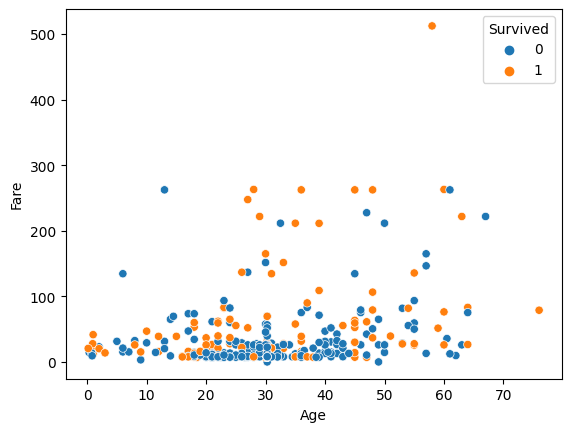

In [26]:
sns.scatterplot(x="Age", y = "Fare" ,hue="Survived", data=titanic_df);

## Multivariate Analysis

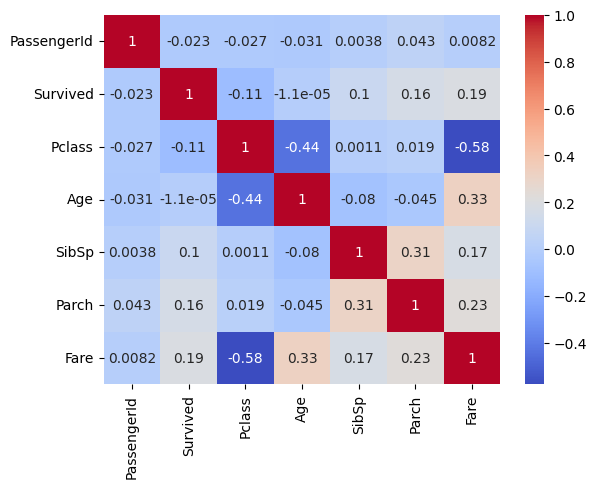

In [27]:
num_cols = titanic_df.select_dtypes(include=["int64","float64"])
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm");


# MODELLING

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [29]:
le = LabelEncoder()
cols = ['Sex',  'Embarked']

for col in cols:
    titanic_df[col] = le.fit_transform(titanic_df[col])

In [30]:

titanic_df = titanic_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
titanic_df = titanic_df.dropna()


X = titanic_df.drop("Survived" , axis=1 )
Y = titanic_df["Survived"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 29)

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)),'\n')
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[71  0]
 [ 0 34]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        34

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random forest

In [33]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 1.0
Confusion Matrix:
[[71  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        34

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



Both models are getting a high accuracy and this may be because the data was imbalanced and we could not use SMOTE because the data was sensitive and imputing could cause more harm than good
